In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
import cv2
from sklearn.model_selection import train_test_split
from tensorflow import keras
from skimage import io
import pickle

Image1[1]



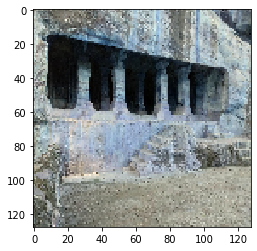

[2]


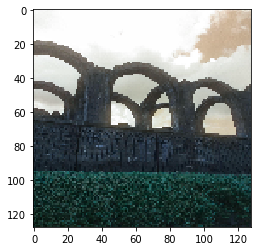

[3]


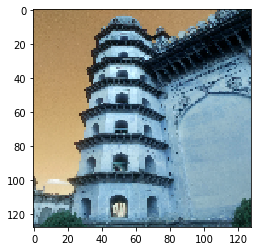

[0]


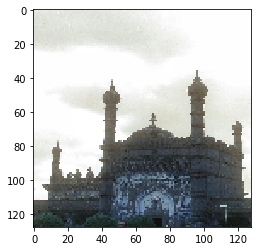

In [3]:
images1 = []
label = []
class_names = ["Ibrahim Roza", "Badami", "Bara Kaman", "Gol Gumbaz"]
files=glob.glob("train/Badami/*.jpg")

for file in files:     
    #image1 = io.imread(file, as_gray=True)
    image1=cv2.imread(file) 
    resized_image = cv2.resize(image1, (128, 128))
    images1.append(resized_image)      
    label.append([1])

print("Image1[1]\n")
plt.imshow(images1[1])       
plt.show()





files=glob.glob("train/Bara kaman/*.jpg")

for file in files:               
    #image1 = io.imread(file, as_gray=True)
    image1=cv2.imread(file) 
    resized_image = cv2.resize(image1, (128, 128))
    images1.append(resized_image)      
    label.append([2])

print(label[20])
plt.imshow(images1[20])       
plt.show()

files=glob.glob("train/Gol Gumbaz/*.jpg")

for file in files:    
    #image1 = io.imread(file, as_gray=True)
    image1=cv2.imread(file) 
    resized_image = cv2.resize(image1, (128, 128))
    images1.append(resized_image)      
    label.append([3])

print(label[30])
plt.imshow(images1[30])       
plt.show()


files=glob.glob("train/Ibrahim roza/*.jpg")

for file in files:  
    #image1 = io.imread(file, as_gray=True)
    image1=cv2.imread(file) 
    resized_image = cv2.resize(image1, (128, 128))
    images1.append(resized_image)      
    label.append([0])

print(label[40])
plt.imshow(images1[40])       
plt.show()

images2=np.array(images1)
label2=np.array(label)

In [4]:
images2[0].shape

(128, 128, 3)

In [17]:
x = tf.placeholder(tf.float32, shape = (None, 128, 128, 3), name = 'input_x')
y = tf.placeholder(tf.float32, shape = (None, 4), name = 'output_y')

keep_prob = tf.placeholder(tf.float32, name = 'keep_prob')

conv1_filter = tf.Variable(tf.truncated_normal(shape = [3, 3, 3, 256], mean = 0, stddev = 0.08))
conv2_filter = tf.Variable(tf.truncated_normal(shape = [3, 3, 256, 128], mean = 0, stddev = 0.08))
conv3_filter = tf.Variable(tf.truncated_normal(shape = [5, 5, 128, 256], mean = 0, stddev = 0.08))
conv4_filter = tf.Variable(tf.truncated_normal(shape = [5, 5, 256, 512], mean = 0, stddev = 0.08))
    
conv1 = tf.nn.conv2d(x, conv1_filter, strides = [1, 1, 1, 1], padding = 'SAME')
conv1 = tf.nn.relu(conv1)
conv1_pool = tf.nn.max_pool(conv1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
conv1_bn = conv1_pool/tf.reduce_max(tf.abs(conv1_pool))

    
conv2 = tf.nn.conv2d(conv1_bn, conv2_filter, strides = [1, 1, 1, 1], padding = 'SAME')
conv2 = tf.nn.relu(conv2)
conv2_pool = tf.nn.max_pool(conv2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
#conv2_bn = tf.keras.layers.BatchNormalization(conv2_pool)
conv2_bn = conv2_pool/tf.reduce_max(tf.abs(conv2_pool))


conv3 = tf.nn.conv2d(conv2_bn, conv3_filter, strides = [1, 1, 1, 1], padding = 'SAME')
conv3 = tf.nn.relu(conv3)
conv3_pool = tf.nn.max_pool(conv1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
#conv3_bn = tf.keras.layers.BatchNormalization(conv3_pool)
conv3_bn = conv3_pool/tf.reduce_max(tf.abs(conv3_pool))


conv4 = tf.nn.conv2d(conv3_bn, conv4_filter, strides = [1, 1, 1, 1], padding = 'SAME')
conv4 = tf.nn.relu(conv4)
conv4_pool = tf.nn.max_pool(conv4, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
#conv4_bn = tf.keras.layers.BatchNormalization(conv4_pool)
conv4_bn = conv4_pool/tf.reduce_max(tf.abs(conv4_pool))


flat = tf.keras.backend.flatten(conv4_bn)

#full1 = tf.contrib.layers.fully_connected(inputs = flat, num_outputs = 128, activation_fn = tf.nn.relu)
full1 = tf.keras.layers.Dense(inputs = flat, units = 128, activation = tf.nn.relu)
full1 = tf.nn.dropout(full1, keep_prob)
full1 = tf.keras.layers.BatchNormalization(full1)
full1 = full1/tf.reduce_max(tf.abs(full1))


full2 = tf.contrib.layers.fully_connected(inputs = full1, num_outputs = 256, activation_fn = tf.nn.relu)
full2 = tf.nn.dropout(full2, keep_prob)
full2 = tf.keras.layers.BatchNormalization(full2)
full2 = full2/tf.reduce_max(tf.abs(full2))


full3 = tf.contrib.layers.fully_connected(inputs = full2, num_outputs = 512, activation_fn = tf.nn.relu)
full3 = tf.nn.dropout(full3, keep_prob)
full3 = tf.keras.layers.BatchNormalization(full3)
full3 = full3/tf.reduce_max(tf.abs(full3))


full4 = tf.contrib.layers.fully_connected(inputs = full3, num_outputs = 1024, activation_fn = tf.nn.relu)
full4 = tf.nn.dropout(full4, keep_prob)
full4 = tf.keras.layers.BatchNormalization(full4)
full4 = full4/tf.reduce_max(tf.abs(full4))

#-----------------------------

fc_weights1=tf.Variable(tf.truncated_normal([14*12*16, 1024],stddev=0.05))  #   14*12*16 input features 
fc_bias1=tf.Variable(tf.random_normal([1024]))               # 1024 bias   

fc_weights2=tf.Variable(tf.random_normal([1024, 2048]))      # Hidden Layer accept 1024 
fc_bias2=tf.Variable(tf.random_normal([2048]))               #2048 bias

fc_weights3=tf.Variable(tf.random_normal([2048, 128]))       
fc_bias3=tf.Variable(tf.random_normal([128]))

fc_weights5=tf.Variable(tf.random_normal([128, 8]))
fc_bias5=tf.Variable(tf.random_normal([8]))

fc_weights4=tf.Variable(tf.random_normal([8,1]))
fc_bias4=tf.Variable(tf.random_normal([1]))


fc1 = tf.reshape(maxpool_output3, [-1, fc_weights1.get_shape().as_list()[0]])
fc1 = tf.add(tf.matmul(fc1, fc_weights1), fc_bias1)
fc1 = tf.nn.sigmoid(fc1)


fcl2 = tf.add(tf.matmul(fc1, fc_weights2), fc_bias2)
fcl2=tf.nn.sigmoid(fcl2)


fcl3 = tf.add(tf.matmul(fcl2, fc_weights3), fc_bias3)
fcl3=tf.nn.sigmoid(fcl3)

fcl4 = tf.add(tf.matmul(fcl3, fc_weights5), fc_bias5)
fcl4=tf.nn.sigmoid(fcl4)




out = tf.keras.layers.fully_connected(inputs = full4, num_outputs = 4, activation_fn = None)
    
    

TypeError: ('Keyword argument not understood:', 'inputs')

In [21]:
def conv_net(x, keep_prob):
    conv1_filter = tf.Variable(tf.truncated_normal(shape = [3, 3, 3, 256], mean = 0, stddev = 0.08))
    conv2_filter = tf.Variable(tf.truncated_normal(shape = [3, 3, 256, 128], mean = 0, stddev = 0.08))
    conv3_filter = tf.Variable(tf.truncated_normal(shape = [5, 5, 128, 256], mean = 0, stddev = 0.08))
    conv4_filter = tf.Variable(tf.truncated_normal(shape = [5, 5, 256, 512], mean = 0, stddev = 0.08))
    
    conv1 = tf.nn.conv2d(x, conv1_filter, strides = [1, 1, 1, 1], padding = 'SAME')
    conv1 = tf.nn.relu(conv1)
    conv1_pool = tf.nn.max_pool(conv1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
    conv1_bn = tf.layers.batch_normalization(conv1_pool)
    
    conv2 = tf.nn.conv2d(conv1_bn, conv2_filter, strides = [1, 1, 1, 1], padding = 'SAME')
    conv2 = tf.nn.relu(conv2)
    conv2_pool = tf.nn.max_pool(conv2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
    conv2_bn = tf.layers.batch_normalization(conv2_pool)
    
    conv3 = tf.nn.conv2d(conv2_bn, conv3_filter, strides = [1, 1, 1, 1], padding = 'SAME')
    conv3 = tf.nn.relu(conv3)
    conv3_pool = tf.nn.max_pool(conv1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
    conv3_bn = tf.layers.batch_normalization(conv3_pool)
    
    conv4 = tf.nn.conv2d(conv3_bn, conv4_filter, strides = [1, 1, 1, 1], padding = 'SAME')
    conv4 = tf.nn.relu(conv4)
    conv4_pool = tf.nn.max_pool(conv4, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
    conv4_bn = tf.layers.batch_normalization(conv4_pool)
    
    flat = tf.contrib.layers.flatten(conv4_bn)
    
    full1 = tf.contrib.layers.fully_connected(inputs = flat, num_outputs = 128, activation_fn = tf.nn.relu)
    full1 = tf.nn.dropout(full1, keep_prob)
    full1 = tf.layers.batch_normalization(full1)
    
    full2 = tf.contrib.layers.fully_connected(inputs = full1, num_outputs = 256, activation_fn = tf.nn.relu)
    full2 = tf.nn.dropout(full2, keep_prob)
    full2 = tf.layers.batch_normalization(full2)
    
    full3 = tf.contrib.layers.fully_connected(inputs = full2, num_outputs = 512, activation_fn = tf.nn.relu)
    full3 = tf.nn.dropout(full3, keep_prob)
    full3 = tf.layers.batch_normalization(full3)
    
    full4 = tf.contrib.layers.fully_connected(inputs = full3, num_outputs = 1024, activation_fn = tf.nn.relu)
    full4 = tf.nn.dropout(full4, keep_prob)
    full4 = tf.layers.batch_normalization(full4)
    
    out = tf.contrib.layers.fully_connected(inputs = full4, num_outputs = 4, activation_fn = None)
    return out
    
    

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [ ]:
model.summary()


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


In [22]:
epochs = 5
batch_size = 128
keep_probability = 0.7
learning_rate = 0.001

In [23]:
logits = conv_net(x, keep_prob)
model = tf.identity(logits, name = "logits")

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name = 'accuracy')

In [28]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    session.run(optimizer,
               feed_dict = {
                   x: feature_batch,
                   y: label_batch,
                   #keep_prob: keep_probability
                   keep_prob: 0.7
               })

In [25]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    loss = sess.run(cost,
                   feed_dict = {
                       x: feature_batch,
                       y: label_batch, 
                       keep_prob: 1
                   })
    
    valid_acc = sess.run(accuracy,
                        feed_dict = {
                            x: valid_features,
                            y: valid_label,
                            keep_prob: 1
                        })
    
    print('Loss {:>10.4f} Validation Accuracy: {:.6f}'.format(loss, valid_acc))

In [26]:
def batch_features_labels(features, labels, batch_size):
    
    for start in range(0, len(features), batch_size):
        end =min(start + batch_size, len(features))
        yield features[start:end], labels[start:end]
        
#def load_preprocess_train_batch(batch_id, batch_size):
    
    

In [54]:
#save_model_path = './image_classification'

print('Training.....')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer().run())
    
    #sess.run(cost,feed_dict = {x: images2,y: label2,keep_prob: 0.7}
    
    #for epoch in range(epochs):
    #train_neural_network(sess, optimizer, keep_probability, images2, label2)
    #keep_prob: keep_probability
                   
    #print_stats(sess, images2, label2, cost, accuracy)
    #loss = sess.run(cost,feed_dict = {x: images2,y: label2, keep_prob: 1})
    
    #valid_acc = sess.run(accuracy,feed_dict = {x: images2,y: label2,keep_prob: 1})
    
    #print('Loss {:>10.4f} Validation Accuracy: {:.6f}'.format(loss, valid_acc))
                
                

SyntaxError: unexpected EOF while parsing (<ipython-input-54-7b9c6149d815>, line 20)